In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score

In [27]:
x = np.random.normal(size=1000)
y = 2.*x + np.random.normal(size=1000)
x = x.reshape(-1,1)

In [32]:
lreg = LinearRegression()

In [39]:
lreg.fit(x, y)
y_pred = lreg.predict(x)

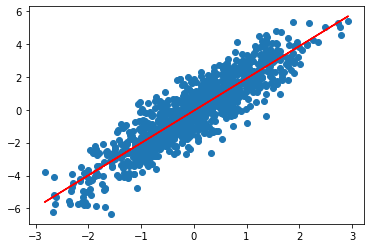

In [41]:
plt.scatter(x,y)
plt.plot(x,y_pred, color='r')

In [42]:
lreg.score(x,y)

0.8006444873219806

# House Market exercise

In [45]:
df = pd.read_csv('./data/kc_house_data.csv')

In [46]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [82]:
df['year'] = [float(d[0:4]) for d in df['date'].values]
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [55]:
features= ['bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade',
           'sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15', 'year']
df_clean = df[features]

In [56]:
feature_importance = feature_selection.mutual_info_regression(df_clean, df.price)

In [63]:
feat_df=pd.DataFrame(list(zip(features,feature_importance)), columns=['features', 'importance'])
feat_df.sort_values('importance', ascending=False)

,features,importance
1,sqft_living,0.353080
7,grade,0.347536
11,sqft_living15,0.271591
0,bedrooms,0.086222
12,sqft_lot15,0.082316
3,floors,0.073772
9,yr_built,0.072224
8,sqft_basement,0.071197
2,sqft_lot,0.060585
5,view,0.058340


In [72]:
best_cols = ['sqft_living', 'grade', 'sqft_living15', 'bedrooms']
df_best = df[best_cols]
df_scaled = pd.DataFrame(preprocessing.scale(df_best))


In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.price, test_size=0.2)

In [79]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
y_pred

array([441927.87609191, 571209.5752171 , 242856.41624142, ...,
       945965.30726611, 150818.49371053, 692152.9298691 ])

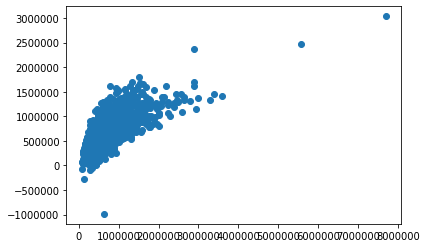

In [85]:
plt.scatter(y_test, y_pred)

In [86]:
lreg.score(X_test, y_test)

0.5349707943991586

### Ridge regression

In [91]:
ridge_regression?

In [95]:
rreg = ridge_regression(X_train, y_train, alpha=0.5)
#rreg.fit()
#y_pred = rreg.predict(X_test)
#y_pred
#...

# K-means

In [129]:
X, y = make_blobs(n_features=3, n_samples=1000, cluster_std=.5)

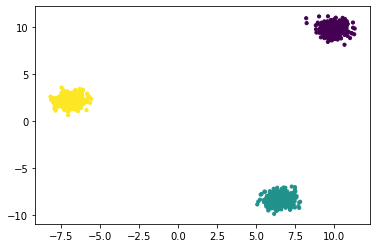

In [130]:
plt.scatter(X[:,0], X[:,1], c=y, s=10)

In [131]:
km = KMeans(X)

In [132]:
km = KMeans(n_clusters=6)

In [133]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

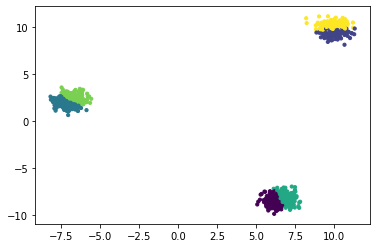

In [134]:
plt.scatter(X[:,0], X[:,1], c=km.predict(X), s=10)